In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from collections import Counter

In [2]:
# Load the normalized data
df = pd.read_csv("../data/processed/chest_signals_normalized.csv")

In [3]:
# Parameters
sampling_rate = 700  # Hz
window_duration = 60  # seconds
window_size = sampling_rate * window_duration  # 42000 samples
stride = window_size // 2  # 50% overlap = 21000 samples

In [4]:
# Features and label
signal_cols = ['ACC_X', 'ACC_Y', 'ACC_Z', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp']
label_col = 'Activity'

In [5]:
X = []
y = []

# Slide through the data
for start in range(0, len(df) - window_size + 1, stride):
    end = start + window_size
    window = df.iloc[start:end]

    # Get the majority label in the window
    majority_label = Counter(window[label_col]).most_common(1)[0][0]

    # Extract the signals only
    signals = window[signal_cols].values  # shape: (window_size, num_features)

    X.append(signals)
    y.append(majority_label)

In [6]:
# Convert to arrays
X = np.array(X)  # shape: (num_windows, window_size, num_features)
y = np.array(y)

print("✅ Segmented data shape:", X.shape)
print("🟢 Sample labels:", np.unique(y, return_counts=True))

✅ Segmented data shape: (171, 42000, 8)
🟢 Sample labels: (array(['Amusement', 'Baseline', 'Meditation', 'Stress'], dtype='<U10'), array([ 21, 100,  12,  38]))


In [7]:
np.save("../data/processed/chest_X.npy", X)
np.save("../data/processed/chest_y.npy", y)

In [8]:
X = np.load("../data/processed/chest_X.npy")  # shape: (N, 42000, 8)
y = np.load("../data/processed/chest_y.npy")  # shape: (N,)

In [9]:
# All signal names (in order used before normalization)
signal_names = ['ACC_X', 'ACC_Y', 'ACC_Z', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp']

# Unique activity labels
unique_activities = np.unique(y)


C:\Users\Joseph\AppData\Local\Temp\ipykernel_58948\2122872159.py:24: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Joseph\generative-health-models\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


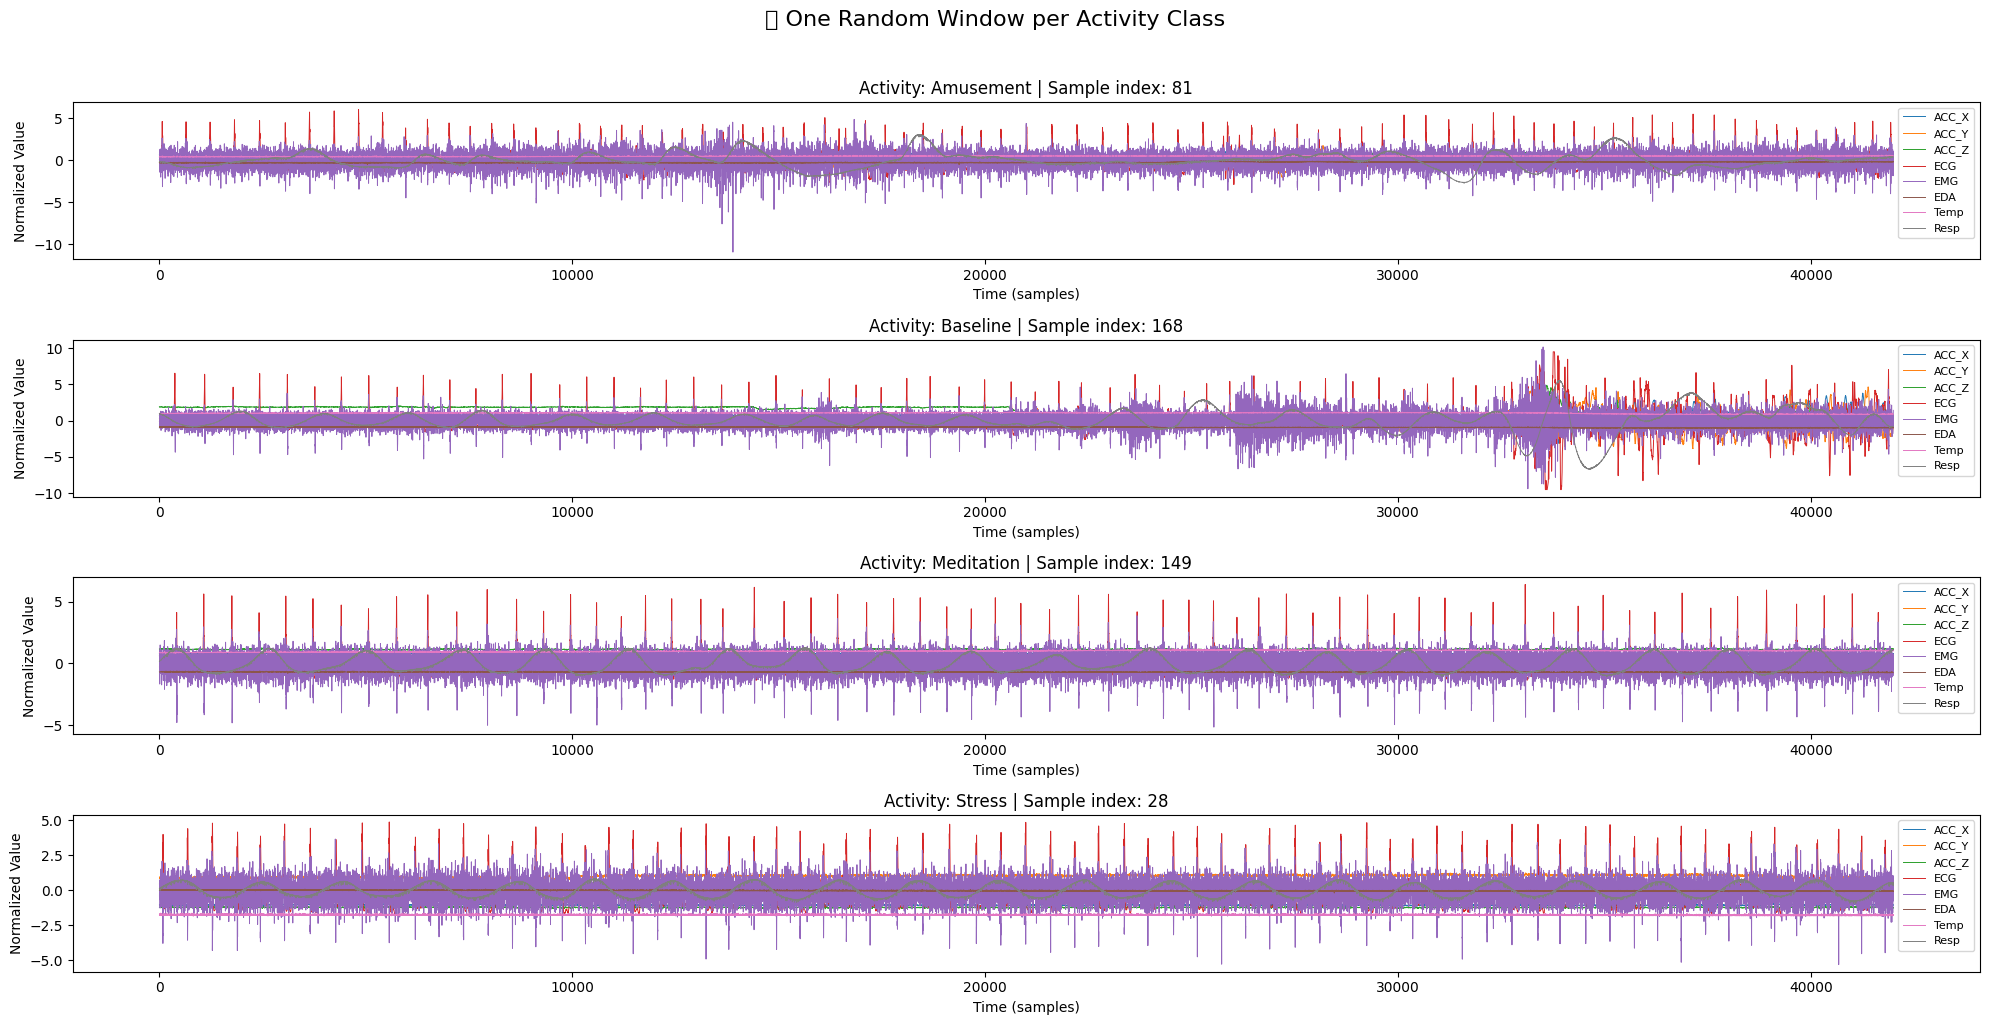

In [12]:
# Plot a random window for each activity
plt.figure(figsize=(20, len(unique_activities) * 2.5))

for i, activity in enumerate(unique_activities):
    # Get all indices for this activity
    indices = np.where(y == activity)[0]
    sample_idx = random.choice(indices)
    
    # Pick the window (shape: 42000 x 8)
    sample_window = X[sample_idx]

    # Plot each signal in the same subplot
    plt.subplot(len(unique_activities), 1, i + 1)
    for j in range(sample_window.shape[1]):
        plt.plot(sample_window[:, j], label=signal_names[j], linewidth=0.7)

    plt.title(f"Activity: {activity} | Sample index: {sample_idx}")
    plt.xlabel("Time (samples)")
    plt.ylabel("Normalized Value")
    plt.legend(loc="upper right", fontsize=8)
    plt.tight_layout()

plt.suptitle("📈 One Random Window per Activity Class", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()